<a href="https://colab.research.google.com/github/khushipatil2606/socia-mediaanalysisforbrand/blob/main/socialmediaanalysisforbrand_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# **Loading Dataset**

In [ ]:
uploaded = files.upload()
file_path = 'social_media_brand_analysis_.csv'
df = pd.read_csv(file_path)
display(df)


Saving social_media_brand_analysis_.csv to social_media_brand_analysis_ (5).csv


,Post_ID,Username,Platform,Brand_Name,Post_Review,Likes,Comments,Shares,Engagement,Sentiment,Location
0,1463,martinezvirginia,Twitter,Prada,"I have mixed opinions on Prada. It’s not bad, ...",39,38,48,7426,Neutral,"New York, USA"
1,1597,nancy11,Instagram,Prada,I can't stop raving about Prada! Best decision...,78,68,54,6293,Positive,"Mumbai, India"
2,1473,clementsrichard,Facebook,Prada,Terrible experience with Prada. Wouldn't recom...,13,32,29,5736,Positive,"Los Angeles, USA"
3,1675,christineblevins,Instagram,Under Armour,Absolutely love the quality of Under Armour! N...,47,60,78,4816,Positive,"Los Angeles, USA"
4,1584,kathrynperkins,Facebook,Zara,I regret buying from Zara. Worst experience ev...,24,38,17,3718,Negative,"Dubai, UAE"
...,...,...,...,...,...,...,...,...,...,...,...
1995,528,dixonmckenzie,Twitter,New Balance,Terrible experience with New Balance. Wouldn't...,22,55,25,5480,Negative,"Berlin, Germany"
1996,48,obowman,Instagram,Zara,Poor customer service from Zara. Not worth it ...,18,26,16,4343,Neutral,"Los Angeles, USA"
1997,258,eric43,Instagram,H&M,Super satisfied with my recent purchase from H...,76,40,40,5600,Positive,"Sydney, Australia"
1998,219,brandondaniels,LinkedIn,H&M,H&M overpromises and underdelivers. Stay away!...,20,9,33,10598,Negative,"Sydney, Australia"


# Handling Missing Value

In [ ]:
missing_values = df.isnull().sum()
missing_values

,0
Post_ID,0
Username,0
Platform,0
Brand_Name,0
Post_Review,0
Likes,0
Comments,0
Shares,0
Engagement,0
Sentiment,0


# **Removeing Dulicates**

In [ ]:
def remove_duplicates(df):
    print("Duplicate Entries Before Removal:", df.duplicated().sum())
    df.drop_duplicates(inplace=True)
    print("Duplicate Entries After Removal:", df.duplicated().sum())
    return df
df = remove_duplicates(df)

Duplicate Entries Before Removal: 0
Duplicate Entries After Removal: 0


# **Handle Outliers**

In [ ]:
Q1 = df[['Likes', 'Comments', 'Shares']].quantile(0.25)
Q3 = df[['Likes', 'Comments', 'Shares']].quantile(0.75)
IQR = Q3 - Q1
outliers = ((df[['Likes', 'Comments', 'Shares']] < (Q1 - 1.5 * IQR)) | (df[['Likes', 'Comments', 'Shares']] > (Q3 + 1.5 * IQR))).sum()
print("\nOutliers Detected:")
print(outliers)


📌 Outliers Detected in Each Column:
Likes       0
Comments    0
Shares      0
dtype: int64


# **Exploratory Data Analysis (EDA)**


In [ ]:
num_df = df.select_dtypes(include='number')
summary_stats = pd.DataFrame({
    'Mean': num_df.mean(),
    'Median': num_df.median(),
    'Mode': num_df.mode().iloc[0],
    'Variance': num_df.var(),
    'Standard Deviation': num_df.std(),
    'Min': num_df.min(),
    'Max': num_df.max(),
    'Count': num_df.count()
})
summary_stats = summary_stats.round(2)
print("Summary Statistics for Numeric Features:\n")
display(summary_stats)

Summary Statistics for Numeric Features:



,Mean,Median,Mode,Variance,Standard Deviation,Min,Max,Count
Post_ID,977.03,978.0,244.0,350247.53,591.82,1,2000,2000
Likes,45.85,46.0,41.0,374.03,19.34,0,92,2000
Comments,45.38,46.0,45.0,358.79,18.94,0,92,2000
Shares,45.37,45.0,42.0,361.89,19.02,0,93,2000
Engagement,7415.94,7381.5,3024.0,9715440.40,3116.96,406,14718,2000


# **Data Visualization**

<Figure size 1200x600 with 0 Axes>

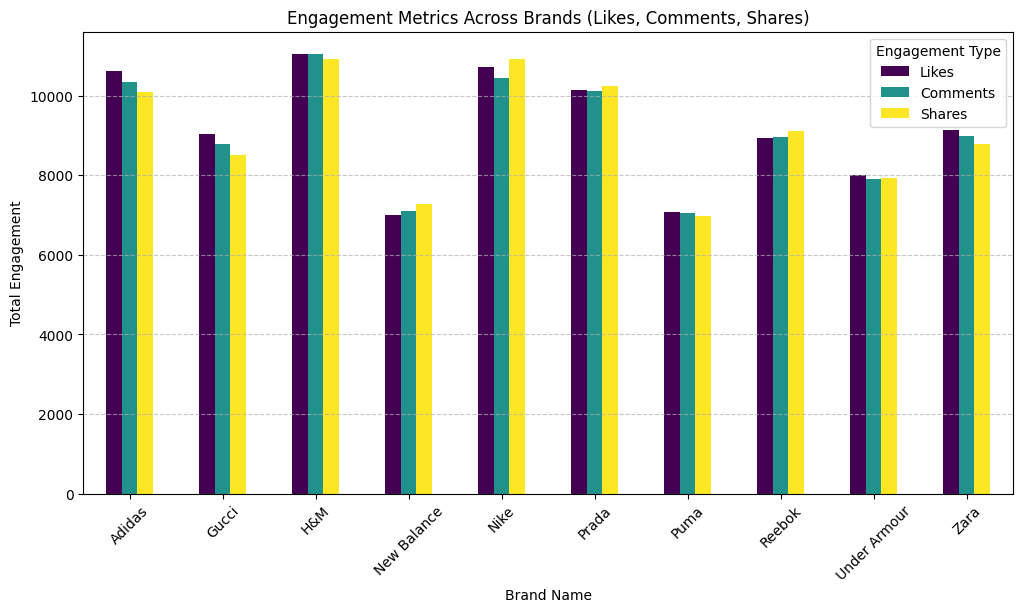

In [ ]:
#BARPLOT
# Group data by Brand_Name and sum up Likes, Comments, and Shares for each brand
brand_engagement = df.groupby("Brand_Name")[["Likes", "Comments", "Shares"]].sum()
plt.figure(figsize=(12, 6))
brand_engagement.plot(kind="bar", stacked= False, colormap="viridis", figsize=(12, 6))
plt.title("Engagement Metrics Across Brands (Likes, Comments, Shares)")
plt.xlabel("Brand Name")
plt.ylabel("Total Engagement")
plt.legend(title="Engagement Type")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

<ipython-input-15-3ca6f87879e6>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Brand_Name", y="Comments", hue="Sentiment", data=brand_sentiment_engagement, palette="dark", ci=None, alpha=0.6)


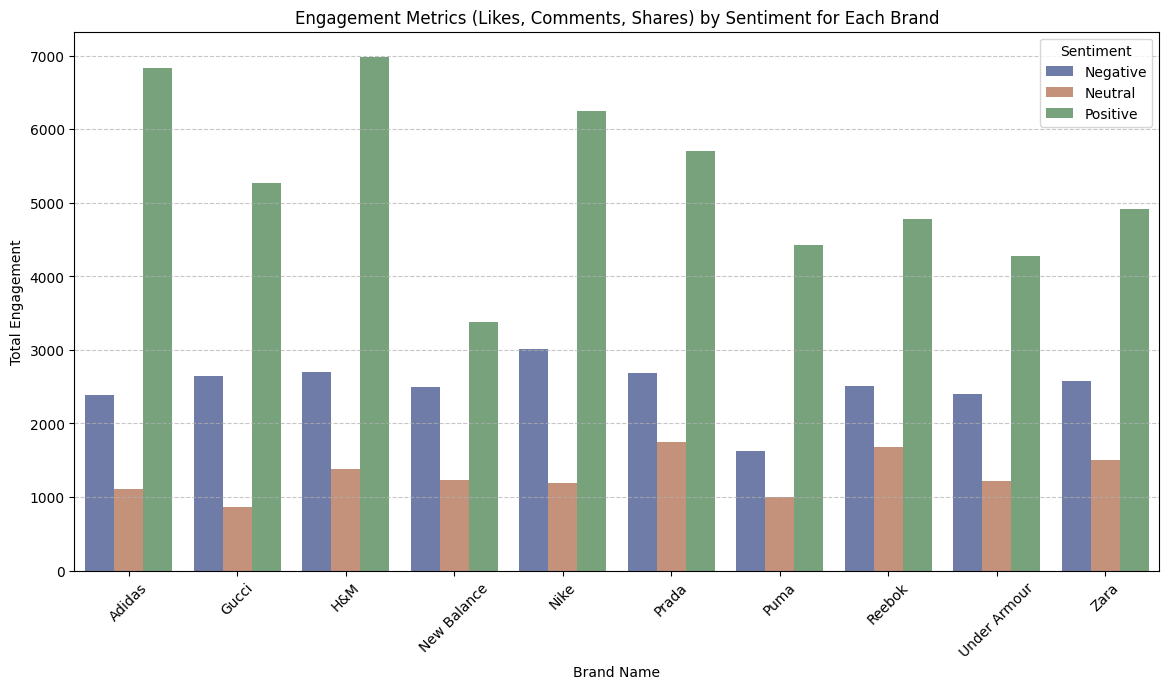

In [ ]:
# BARPLOT
# Summing Likes, Comments, and Shares for each Brand and Sentiment category
brand_sentiment_engagement = df.groupby(["Brand_Name", "Sentiment"])[["Likes", "Comments", "Shares"]].sum()
plt.figure(figsize=(14, 7))
sns.barplot(x="Brand_Name", y="Comments", hue="Sentiment", data=brand_sentiment_engagement, palette="dark", ci=None, alpha=0.6)
plt.title("Engagement Metrics (Likes, Comments, Shares) by Sentiment for Each Brand")
plt.xlabel("Brand Name")
plt.ylabel("Total Engagement")
plt.xticks(rotation=45)
plt.legend(title="Sentiment", loc="upper right")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

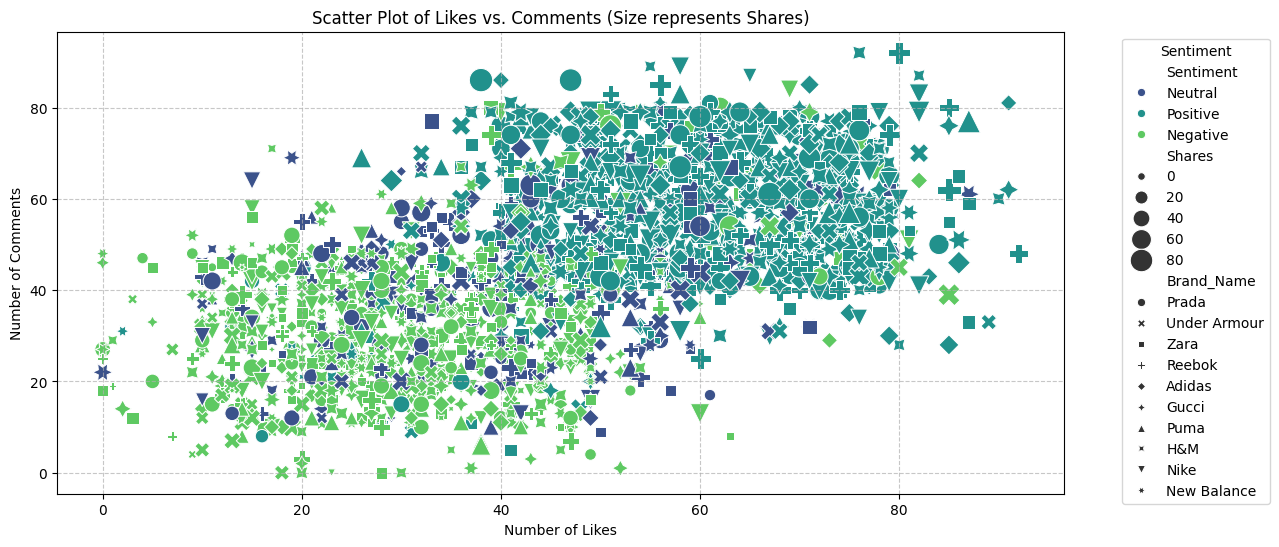

In [ ]:
#scatter plot
plt.figure(figsize=(13, 6))
sns.scatterplot(x=df["Likes"], y=df["Comments"], size=df["Shares"], hue=df["Sentiment"], style=df["Brand_Name"], palette="viridis", sizes=(30, 300))
plt.title("Scatter Plot of Likes vs. Comments (Size represents Shares)")
plt.xlabel("Number of Likes")
plt.ylabel("Number of Comments")
plt.legend(title="Sentiment", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

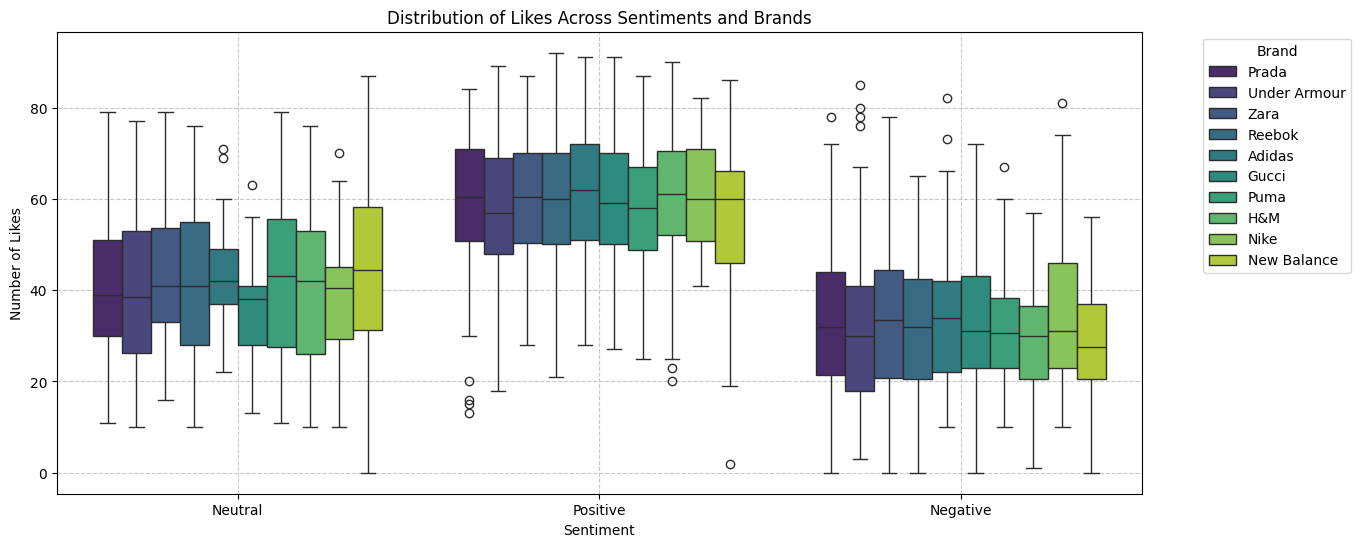

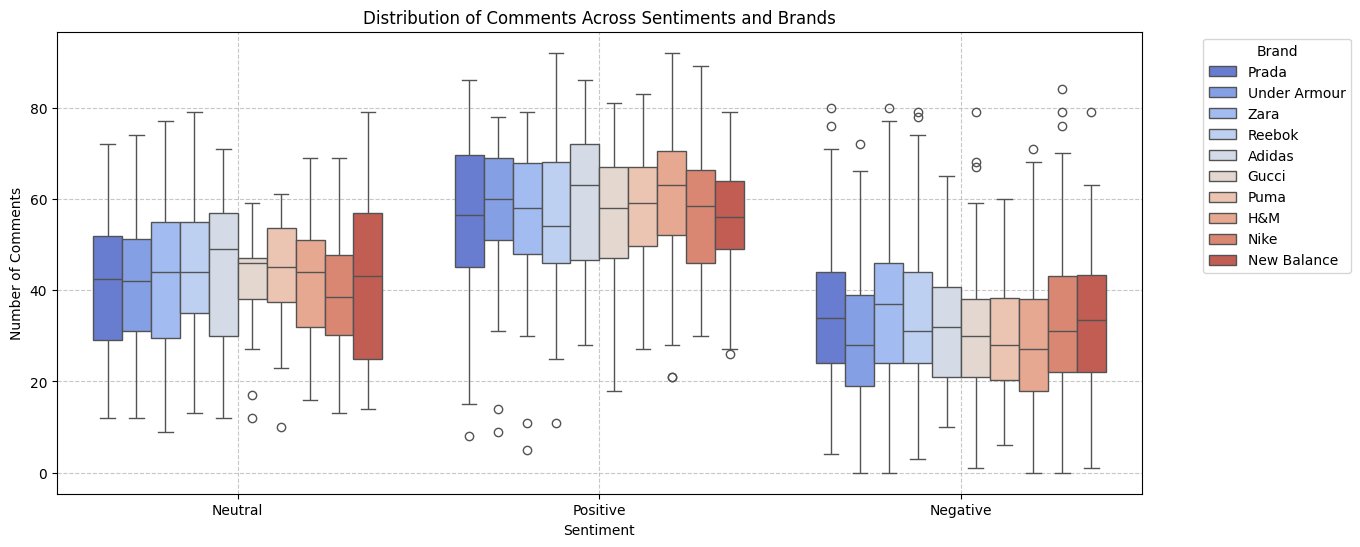

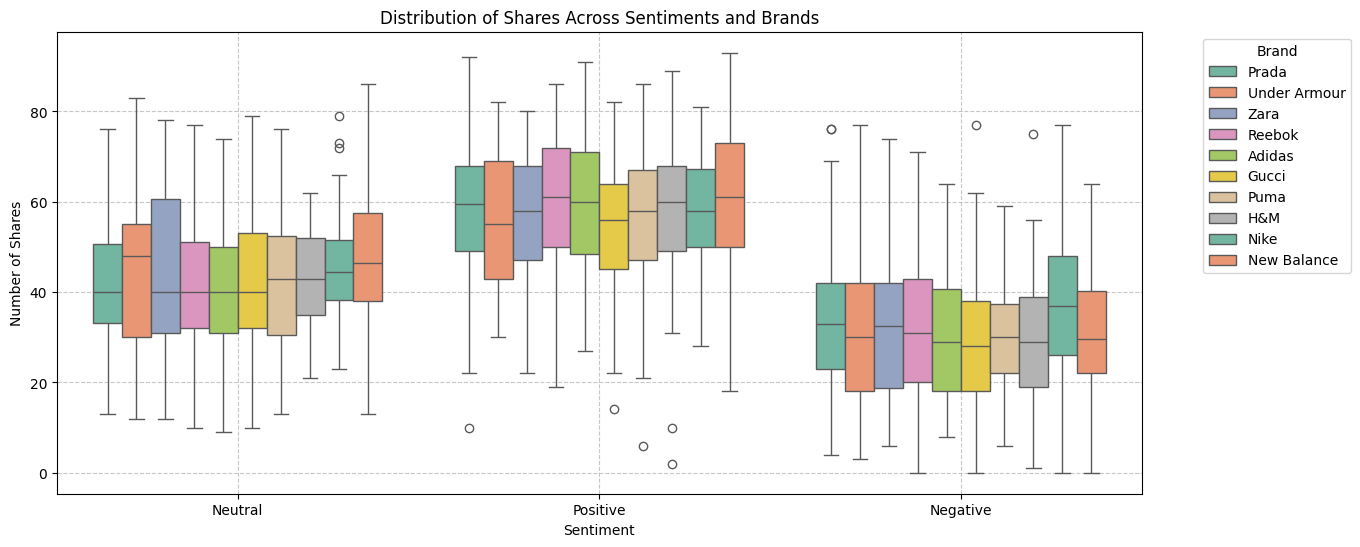

In [ ]:
#box plot for likes
plt.figure(figsize=(14, 6))
sns.boxplot(x="Sentiment", y="Likes", hue="Brand_Name", data=df, palette="viridis")
plt.title("Distribution of Likes Across Sentiments and Brands")
plt.xlabel("Sentiment")
plt.ylabel("Number of Likes")
plt.grid(True, linestyle="--", alpha=0.7)
plt.legend(title="Brand", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

# box plot for the comments
plt.figure(figsize=(14, 6))
sns.boxplot(x="Sentiment", y="Comments", hue="Brand_Name", data=df, palette="coolwarm")
plt.title("Distribution of Comments Across Sentiments and Brands")
plt.xlabel("Sentiment")
plt.ylabel("Number of Comments")
plt.grid(True, linestyle="--", alpha=0.7)
plt.legend(title="Brand", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

# box plot for the shares
plt.figure(figsize=(14, 6))
sns.boxplot(x="Sentiment", y="Shares", hue="Brand_Name", data=df, palette="Set2")
plt.title("Distribution of Shares Across Sentiments and Brands")
plt.xlabel("Sentiment")
plt.ylabel("Number of Shares")
plt.grid(True, linestyle="--", alpha=0.7)
plt.legend(title="Brand", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

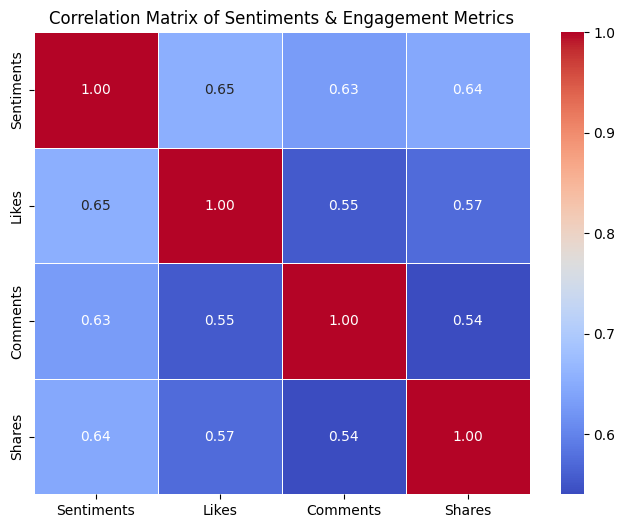

In [ ]:
#correlation matrix

sentiment_mapping = {"Positive": 1, "Neutral": 0, "Negative": -1}
df["Sentiments"] = df["Sentiment"].map(sentiment_mapping)
correlation_data = df[["Sentiments", "Likes", "Comments", "Shares"]]
correlation_matrix = correlation_data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Sentiments & Engagement Metrics")
plt.show()

# **Model Training**

In [ ]:
X = df[['Likes', 'Comments', 'Shares']]
y = df['Sentiment']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42, max_depth=10, min_samples_split=5),
    "SVM": SVC(kernel='linear', decision_function_shape='ovr'),
    "KNN": KNeighborsClassifier(n_neighbors=5)  # You can tweak n_neighbors as needed
}
accuracy_results = {}
for name, model in models.items():
    if name in ["SVM", "KNN"]:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred) * 100
    accuracy_results[name] = acc
    print(f"{name} Accuracy: {acc:.2f}%")


Decision Tree Accuracy: 64.25%
Random Forest Accuracy: 80.00%
SVM Accuracy: 78.00%
KNN Accuracy: 77.50%


<ipython-input-31-cf82893eb0b7>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(accuracy_results.keys()), y=list(accuracy_results.values()), palette="coolwarm")


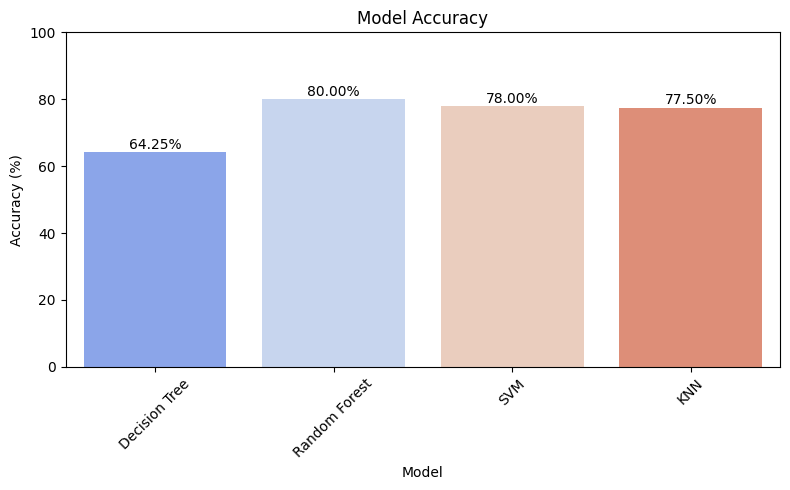

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(x=list(accuracy_results.keys()), y=list(accuracy_results.values()), palette="coolwarm")
plt.ylabel("Accuracy (%)")
plt.xlabel("Model")
plt.title("Model Accuracy")
plt.ylim(0, 100)
plt.xticks(rotation=45)

for i, val in enumerate(accuracy_results.values()):
    plt.text(i, val + 1, f"{val:.2f}%", ha='center', fontsize=10)

plt.tight_layout()
plt.show()

## **Performance Metrics Calculation**

In [ ]:
results = {}
for name, model in models.items():
    if name in ["SVM", "KNN"]:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        y_prob = model.predict_proba(X_test_scaled) if hasattr(model, "predict_proba") else None
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test) if hasattr(model, "predict_proba") else None

    # Metrics
    accuracy = accuracy_score(y_test, y_pred) * 100
    precision = precision_score(y_test, y_pred, average="weighted") * 100
    recall = recall_score(y_test, y_pred, average="weighted") * 100
    f1 = f1_score(y_test, y_pred, average="weighted") * 100
    auc_roc = roc_auc_score(y_test, y_prob, multi_class="ovr") * 100 if y_prob is not None else None

    # Store results
    results[name] = {
        "Accuracy (%)": accuracy,
        "Precision (%)": precision,
        "Recall (%)": recall,
        "F1-score (%)": f1,
        "AUC-ROC (%)": auc_roc
    }

    # Print results
    print(f"\n{name} Performance Metrics:")
    print(f"Accuracy: {accuracy:.2f}%")
    print(f"Precision: {precision:.2f}%")
    print(f"Recall: {recall:.2f}%")
    print(f"F1-score: {f1:.2f}%")
    if auc_roc is not None:
        print(f"AUC-ROC: {auc_roc:.2f}%")

# DataFrame of results
results_df = pd.DataFrame(results).T
display(results_df)


Decision Tree Performance Metrics:
Accuracy: 64.25%
Precision: 65.51%
Recall: 64.25%
F1-score: 64.77%
AUC-ROC: 68.81%

Random Forest Performance Metrics:
Accuracy: 80.00%
Precision: 78.88%
Recall: 80.00%
F1-score: 77.20%
AUC-ROC: 84.52%

SVM Performance Metrics:
Accuracy: 78.00%
Precision: 66.14%
Recall: 78.00%
F1-score: 71.53%

KNN Performance Metrics:
Accuracy: 77.50%
Precision: 74.05%
Recall: 77.50%
F1-score: 74.65%
AUC-ROC: 82.58%


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,Accuracy (%),Precision (%),Recall (%),F1-score (%),AUC-ROC (%)
Decision Tree,64.25,65.507542,64.25,64.770061,68.810158
Random Forest,80.00,78.881458,80.00,77.196558,84.517893
SVM,78.00,66.138095,78.00,71.533695,NaN
KNN,77.50,74.054977,77.50,74.650011,82.577673


<Figure size 1200x600 with 0 Axes>

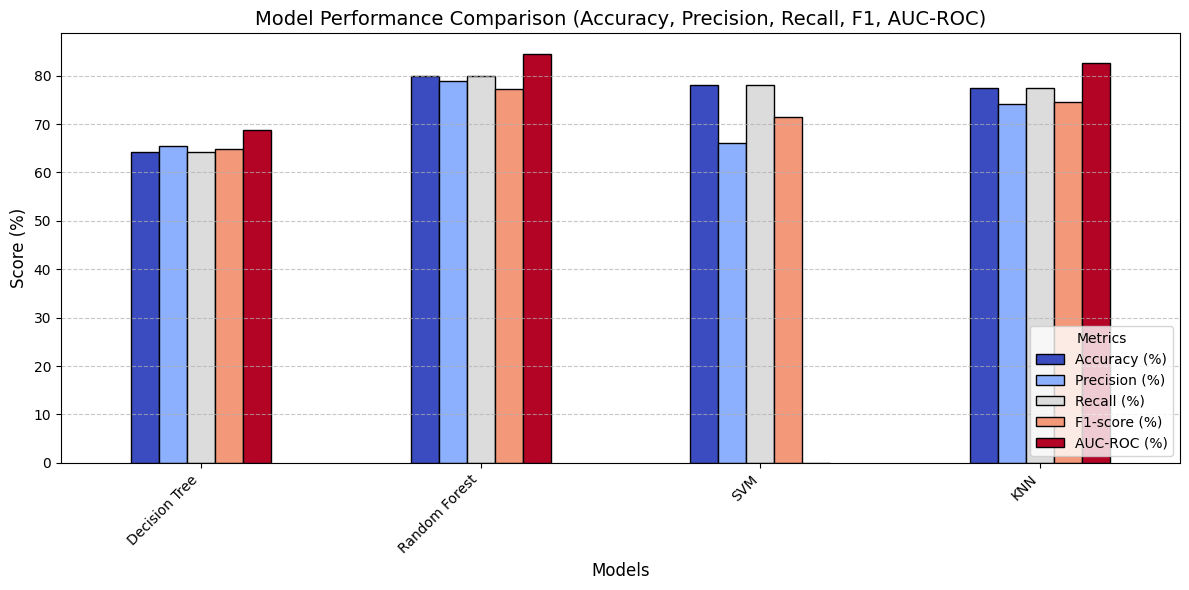

In [ ]:
plt.figure(figsize=(12, 6))
results_df.plot(kind="bar", figsize=(12, 6), colormap="coolwarm", edgecolor='black')

plt.title("Model Performance Comparison (Accuracy, Precision, Recall, F1, AUC-ROC)", fontsize=14)
plt.ylabel("Score (%)", fontsize=12)
plt.xlabel("Models", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title="Metrics", loc="lower right", fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()

plt.show()

Models Ranked by Average Performance


 Models Ranked by Average Performance:


,Accuracy (%),Precision (%),Recall (%),F1-score (%),AUC-ROC (%),Avg Score (%)
Random Forest,80.00,78.88,80.00,77.20,84.52,80.12
KNN,77.50,74.05,77.50,74.65,82.58,77.26
SVM,78.00,66.14,78.00,71.53,NaN,73.42
Decision Tree,64.25,65.51,64.25,64.77,68.81,65.52



 Best Performing Model: **Random Forest**


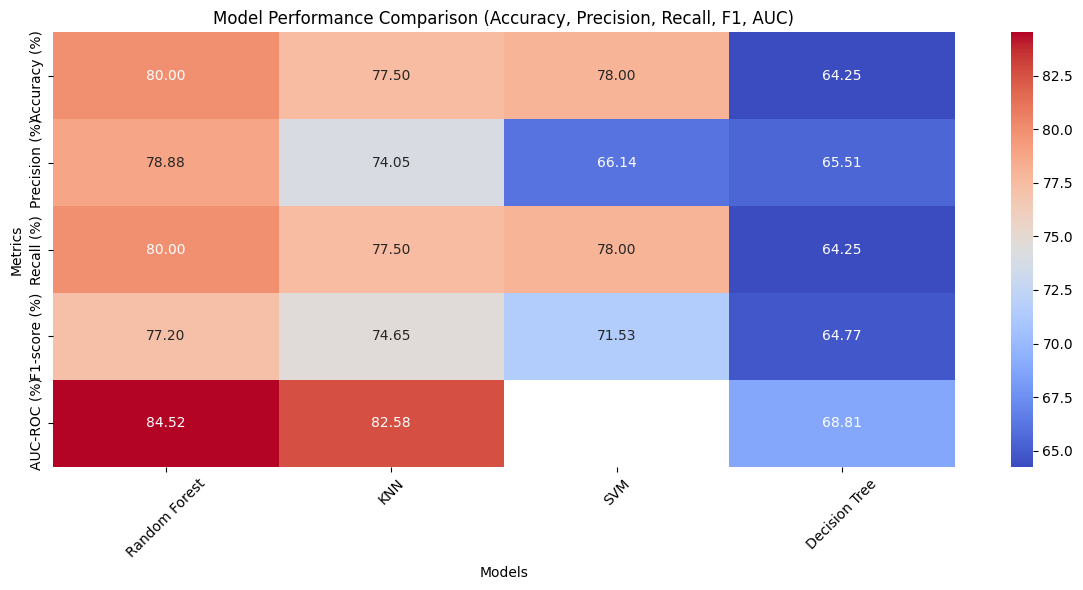

In [ ]:
results_df['Avg Score (%)'] = results_df.mean(axis=1, skipna=True)
sorted_results = results_df.sort_values(by="Avg Score (%)", ascending=False)
print("\n Models Ranked by Average Performance:")
display(sorted_results.round(2))
best_model = sorted_results.index[0]
print(f"\n Best Performing Model: **{best_model}**")
plt.figure(figsize=(12, 6))
sns.heatmap(sorted_results.drop(columns=["Avg Score (%)"]).T, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Model Performance Comparison (Accuracy, Precision, Recall, F1, AUC)")
plt.xlabel("Models")
plt.ylabel("Metrics")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()